# Analysis report for opening a New Restaurant in NY

## Introduction

This is a Capstone project wherein am trying to find a s uitable place in Newyork City to open a ne restaurant. The city is filled with variety of people and it has all types of cuisines. The below link describes the various cuisines in New york and which neighborhood serves what cuisine.

https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

We will restrict our report to the top 3 neighborhoods which favours the opening of new restaurant

## Business Problem

Newyork city has a diverse population and serves as a Global hub for many industries. It has people from all over the world and have a different taste when comes to tasting a food. It already has a lot of restaurants which are famous and satisfied the people in Newyork. So starting a new restaurant in the area where we have established restaurants invovles lot of analysis.

Few of the critical things that we need to consider before opening up a restaurant is

NY demographics

Population

Cuisines served

Competitors in the area 

Unexplored horizon 

Nearby venues that favours the opening of new restaurant Nearby Markets

## Target Audience

Anyone who wants to open a new restaurant in NY city

## Data Section

Since we have taken New york city for our analysis. The following datasets will be used ot get the required data that will help us in completing the project.

https://cocl.us/new_york_dataset - NY neighborhood and Borough data


https://en.wikipedia.org/wiki/Cuisine_of_New_York_City - Cuisines of NY city


Coordinates from Foursquare API to explore the neighborhoods of NY city

## Methodology

Data will be collected from https://cocl.us/new_york_dataset  using bs4 webscraping utility.

The collected data will be cleaned and loaded into a data frame fro further analysis.

Foursquare API will be used to locate the venues with restaurants.

Data will be processed and sorted based on the number of restaurants in the neigborhood

Data will be visually assessed to make any decision using Folium

## Execution of codes

Importing the necessary Libraries to perform our analysis

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

Setting the variables for Foursquare API

In [8]:
CLIENT_ID='GRYUV3ZB4HL12NPLTM20GIN544MJSFNRMSYEO3HTV2WFTSVP'
CLIENT_SECRET='OC0GM2USL4DBQ1WDALZBZGUWNHG4LMOTM4ZUH3GIYOF3O3IU'
VERSION = '20191117'
print('Your Credentials')
print('Client ID  ' + CLIENT_ID)
print('Client Secret  ' + CLIENT_SECRET)


Your Credentials
Client ID  GRYUV3ZB4HL12NPLTM20GIN544MJSFNRMSYEO3HTV2WFTSVP
Client Secret  OC0GM2USL4DBQ1WDALZBZGUWNHG4LMOTM4ZUH3GIYOF3O3IU


Defining the following functions that will be used in our exercise

Function to return Longitude and Latitude values

Function to hit Foursquar API to get the venue and other details

Function to scrap NY data

In [9]:
def geo_location(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    radius=400
    LIMIT=100
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    features=resp['features']
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

Using the function to get the NY data using webscraping and displaying the first 5 rows using head() function

In [10]:
ny_df=get_new_york_data()
ny_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Using Shape to see # of columns and rows

In [11]:
ny_df.shape

(306, 4)

Let us plot the data to see how many neighborhoods each Borough has

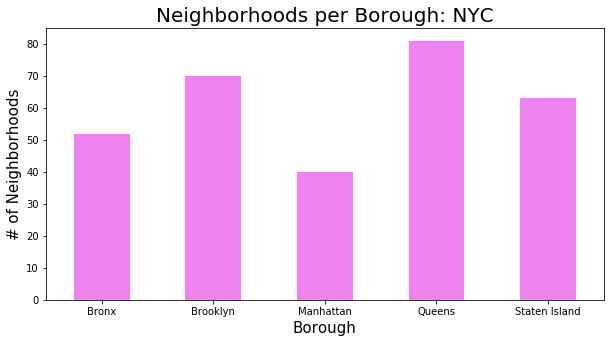

In [12]:
clr = "violet"
ny_df.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('# of Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

From the above chart, we could see that Manhattan has the less number of Neighborhoods

Let us use the Foursquare API to see how many restaurants are there in each Borough

In [14]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    restaurants=venues[venues['Category']=='Restaurant']   
    print('(',count,'/',len(ny_df),')','Restaurants in '+Neighborhood+', '+Borough+':'+str(len(restaurants)))
    print(row)
    for restaurant_detail in restaurants.values.tolist():
        id, name , category=restaurant_detail
        rest_ny = rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Restaurants in Co-op City, Bronx:1
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Restaurants in Norwood, Bronx:0
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
( 10 / 306 ) Re

Now we got the restaurants details from Foursquare, let us save it as csv for further analysis

In [29]:
rest_ny.to_csv('rest_ny_total.csv')
rest_ny=pd.read_csv('rest_ny_total.csv', index_col=0)
rest_ny.head()

,Unnamed: 0.1,Borough,Neighborhood,ID,Name
0,0,Bronx,Co-op City,4be2b79d660ec9284d04ca3b,Townhouse Restaurant
1,1,Bronx,High Bridge,515e03abe4b023634cb3bf39,Checkers
2,2,Bronx,Port Morris,4ddaa9ccd1647fcf3e96c5c8,Walnut Bus Stop
3,3,Bronx,Hunts Point,5b901665dd70c5002c9f6cbc,City Tamale Inc
4,4,Brooklyn,Greenpoint,55d7c6bb498efa168c9483a9,Archestratus Books & Foods


In [30]:
rest_ny.shape

(57, 5)

Let us plot the data visually to understand it better

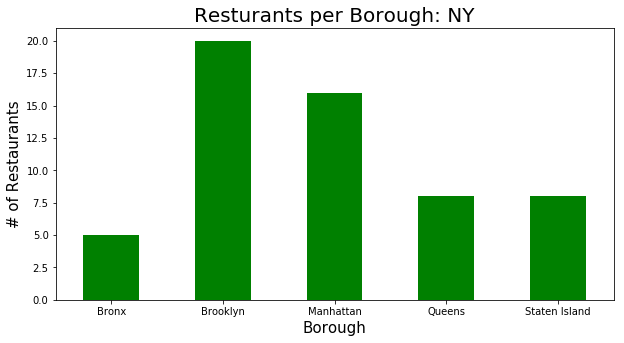

In [31]:
clr='green'
rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Resturants per Borough: NY', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('# of Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

From the above chart we can understand that Brooklyn has more number of restaurants compared to other Boroughs. Let us see how the restaurants are spead across Neighborhoods. For our analysis, let us pick the top 5 neighborhoods.

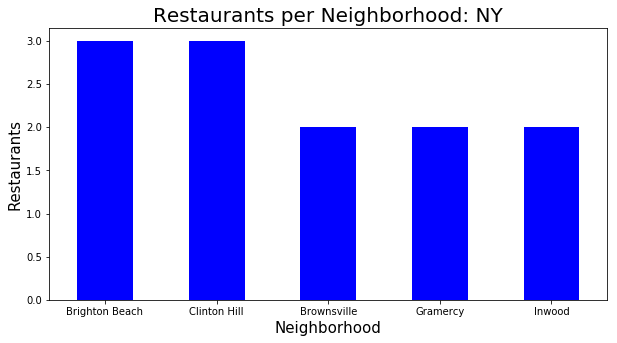

In [32]:
Neigh = 5
rest_ny.groupby('Neighborhood')['ID'].count().nlargest(Neigh).plot.bar(figsize=(10,5), color='blue')
plt.title('Restaurants per Neighborhood: NY', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

From the above chart, we could see that Brighton beach and Clinton Hill Neighborhood has more number of restaurants compared to other Neighborhood

In [33]:
rest_ny[rest_ny['Neighborhood']=='Clinton Hill']

,Unnamed: 0.1,Borough,Neighborhood,ID,Name
16,16,Brooklyn,Clinton Hill,54d4d008498e254c1e68dee4,Bar Bolinas
17,17,Brooklyn,Clinton Hill,597a809e0e5da85ede1b9705,GB Crown Tavern
18,18,Brooklyn,Clinton Hill,55dfb656498e758dc3f5e3c4,Gentleman Farmer Fort Greene


In [34]:
rest_ny[rest_ny['Neighborhood']=='Brighton Beach']

,Unnamed: 0.1,Borough,Neighborhood,ID,Name
5,5,Brooklyn,Brighton Beach,5349fdc1498ee631eb0d5fc5,Georgian House in NYC
6,6,Brooklyn,Brighton Beach,4be739eebcef2d7f4b0806e5,The National
7,7,Brooklyn,Brighton Beach,543eaf90498e65a9a16512c0,Vis à Vis


In [40]:
rest_ny.drop(rest_ny.columns[rest_ny.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Co-op City,4be2b79d660ec9284d04ca3b,Townhouse Restaurant
1,Bronx,High Bridge,515e03abe4b023634cb3bf39,Checkers
2,Bronx,Port Morris,4ddaa9ccd1647fcf3e96c5c8,Walnut Bus Stop
3,Bronx,Hunts Point,5b901665dd70c5002c9f6cbc,City Tamale Inc
4,Brooklyn,Greenpoint,55d7c6bb498efa168c9483a9,Archestratus Books & Foods


Let us use the Foursquare API to get information about the likes,tips and ratings for each restaurant

In [41]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(rest_ny),')','processed')
    rest_stats_ny = rest_stats_ny.append({'Borough': Borough,
                                        'Neighborhood': Neighborhood, 
                                        'ID': id,
                                        'Name' : name,
                                        'Likes' : likes,
                                        'Rating' : rating,
                                        'Tips' : tips
                                             }, ignore_index=True)
    count+=1
rest_stats_ny.head()

{'meta': {'code': 200, 'requestId': '5dd184bd0f596800288a349a'}, 'response': {'venue': {'id': '4be2b79d660ec9284d04ca3b', 'name': 'Townhouse Restaurant', 'contact': {'phone': '7183201072', 'formattedPhone': '(718) 320-1072'}, 'location': {'address': '129 Dreiser Loop', 'lat': 40.876085887834265, 'lng': -73.82886815052547, 'labeledLatLngs': [{'label': 'display', 'lat': 40.876085887834265, 'lng': -73.82886815052547}], 'postalCode': '10475', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['129 Dreiser Loop', 'Bronx, NY 10475', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/townhouse-restaurant/4be2b79d660ec9284d04ca3b', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 2, 'message'

KeyError: 'venue'

Saving the file as CSV

In [42]:
rest_stats_ny.to_csv('rest_stats_ny_csv.csv')
rest_stats_ny.shape
rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough         50 non-null object
Neighborhood    50 non-null object
ID              50 non-null object
Name            50 non-null object
Likes           50 non-null object
Rating          50 non-null float64
Tips            50 non-null object
dtypes: float64(1), object(6)
memory usage: 2.8+ KB


changing the data type as float64 for Likes and Tips

In [43]:
rest_stats_ny['Likes']=rest_stats_ny['Likes'].astype('float64')
rest_stats_ny['Tips']=rest_stats_ny['Tips'].astype('float64')
rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough         50 non-null object
Neighborhood    50 non-null object
ID              50 non-null object
Name            50 non-null object
Likes           50 non-null float64
Rating          50 non-null float64
Tips            50 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


Using Describe function to check the categorical variable

In [44]:
rest_stats_ny.describe()

,Likes,Rating,Tips
count,50.000000,50.000000,50.000000
mean,36.160000,6.204000,9.920000
std,50.941888,3.062076,12.569545
min,0.000000,0.000000,0.000000
25%,5.000000,6.200000,2.000000
50%,11.000000,7.400000,6.000000
75%,58.500000,8.175000,11.750000
max,232.000000,9.500000,65.000000


Finding the restaurant with maximum Likes

In [45]:
rest_stats_ny.iloc[rest_stats_ny['Likes'].idxmax()]

Borough                                 Queens
Neighborhood                       Lefrak City
ID                    513502cbe4b0feed3fa72299
Name            Miller's Ale House - Rego Park
Likes                                      232
Rating                                       8
Tips                                        65
Name: 40, dtype: object

Finding the restaurant with maximum ratings

In [46]:
rest_stats_ny.iloc[rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood          Financial District
ID              5c883f65f4b525002c0bf2ca
Name                           Crown Shy
Likes                                103
Rating                               9.5
Tips                                  24
Name: 33, dtype: object

Finding the restaurant with maximum tips

In [47]:
rest_stats_ny.iloc[rest_stats_ny['Tips'].idxmax()]

Borough                                 Queens
Neighborhood                       Lefrak City
ID                    513502cbe4b0feed3fa72299
Name            Miller's Ale House - Rego Park
Likes                                      232
Rating                                       8
Tips                                        65
Name: 40, dtype: object

let us group the top 10 restaurant by neighborhood which has good ratings

In [48]:
ny_neighborhood_stats=rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
14,Financial District,9.50
18,Greenpoint,9.30
17,Gramercy,8.70
38,Washington Heights,8.60
26,Long Island City,8.50
34,South Side,8.50
28,Murray Hill,8.45
6,Carnegie Hill,8.30
37,Upper West Side,8.20
15,Fort Greene,8.20


Let us repeat the above step to find the Borough wise Top restaurants based on the Rating

In [49]:
ny_borough_stats=rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.169231
3,Queens,7.457143
1,Brooklyn,6.966667
4,Staten Island,2.600000
0,Bronx,1.400000


Let us visualize the above metrics using a plot

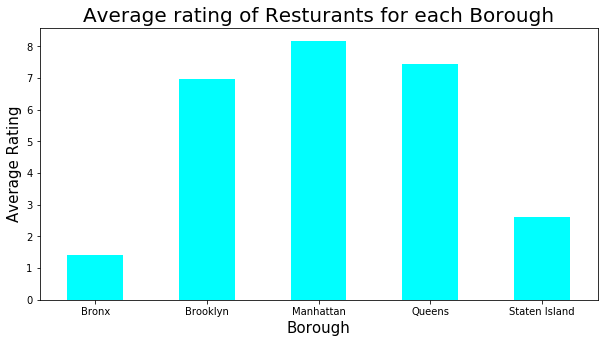

In [55]:
rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color='cyan')
plt.title('Average rating of Resturants for each Borough', fontsize=20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

Let us visually map the data in a map to understand and analyze the data better

In [61]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=6.0]
ny_neighborhood_stats

,Borough_x,Neighborhood,Latitude_x,Longitude_x,Average Rating,Borough_y,Latitude_y,Longitude_y
0,Manhattan,Carnegie Hill,40.782683,-73.953256,8.30,Manhattan,40.782683,-73.953256
1,Manhattan,Financial District,40.707107,-74.010665,9.50,Manhattan,40.707107,-74.010665
2,Brooklyn,Fort Greene,40.688527,-73.972906,8.20,Brooklyn,40.688527,-73.972906
3,Manhattan,Gramercy,40.737210,-73.981376,8.70,Manhattan,40.737210,-73.981376
4,Brooklyn,Greenpoint,40.730201,-73.954241,9.30,Brooklyn,40.730201,-73.954241
5,Queens,Lefrak City,40.736075,-73.862525,8.00,Queens,40.736075,-73.862525
6,Manhattan,Lenox Hill,40.768113,-73.958860,8.00,Manhattan,40.768113,-73.958860
7,Queens,Long Island City,40.750217,-73.939202,8.50,Queens,40.750217,-73.939202
8,Manhattan,Murray Hill,40.748303,-73.978332,8.45,Manhattan,40.748303,-73.978332
9,Manhattan,Murray Hill,40.748303,-73.978332,8.45,Queens,40.764126,-73.812763


Merging two data frames using Neighborhood

In [62]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_df, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Carnegie Hill,40.782683,-73.953256,8.30
1,Manhattan,Financial District,40.707107,-74.010665,9.50
2,Brooklyn,Fort Greene,40.688527,-73.972906,8.20
3,Manhattan,Gramercy,40.737210,-73.981376,8.70
4,Brooklyn,Greenpoint,40.730201,-73.954241,9.30
5,Queens,Lefrak City,40.736075,-73.862525,8.00
6,Manhattan,Lenox Hill,40.768113,-73.958860,8.00
7,Queens,Long Island City,40.750217,-73.939202,8.50
8,Manhattan,Murray Hill,40.748303,-73.978332,8.45
9,Queens,Murray Hill,40.764126,-73.812763,8.45


Using Folim to plot in the maps

In [69]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=11)
incidents = folium.map.FeatureGroup()
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [70]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
ny_map.add_child(incidents)

## Results and Conclusion

Going by the metrics, the number of restaurants in the Borough "Bronx" is less compared to other Boroughs which implies the competition is less to start a new restaurant.The average rating in "Bronx" is also very less compared to other Boroughs, which implies the people in Bronx are not happy with the restaurants that are currently functioning. A new restaurant satisfying the needs of the people in Bronx will be a right choice going by the metrics. Also please note, the analysis and the findings are purely based on the data sets and available ratings,likes in the Foursquare API. There might be more data which may not be captured or stored in Foursquare which will change the outcome. It is always better to re execute this analysis on top of various available datasets to arrive at the final outcome.